In [1]:
# Script Name: EDA Analysis on the Datasets
# Author: Rahul Kumar
# Date: 11/3/22
# Description: Gain some insights on the dataset

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# This actually sets the pandas display to show all rows and columns 
# when you are showing a dataframe, without skipping the center
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Strings for using in writing of files

filepath = '../../UNSW-PROJECT-DATA/' # If you want to run the code, change the file path to where you store the files. This reference
                                # is to where I store the files outside the github clone
    
images = 'images/' #My folder specific image folder

csv = '.csv'
xlsx = '.xlsx'

In [3]:
# c_file = 'combined'
# c_file = 'combined_fd_Avg'
# c_file = 'demand_pv_temp_forecast_timefeatures_hols'
c_file = 'dataset_v1_0'

data = pd.read_csv(filepath+c_file+csv)
# data = data.drop(data.columns[0], axis=1)

def day_type_cat(day_type):
    if day_type =='Day':
        return 0
    else:
        return 1


In [4]:
data.head()


,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY
0,NSW,2010-01-01 00:00:00,8038.00,NaN,Bankstown,23.1,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
1,NSW,2010-01-01 00:30:00,7809.31,NaN,Bankstown,22.9,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
2,NSW,2010-01-01 01:00:00,7483.69,NaN,Bankstown,22.6,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
3,NSW,2010-01-01 01:30:00,7117.23,NaN,Bankstown,22.5,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
4,NSW,2010-01-01 02:00:00,6812.03,NaN,Bankstown,22.5,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True


In [5]:
percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missing})
missing_value_df

,% Missing
STATE,0.00
DATETIME,0.00
TOTALDEMAND,0.00
POWER,70.74
LOCATION,0.00
TEMPERATURE,0.00
FORECASTDEMAND,42.46
Weekday,0.00
Quarter,0.00
Month,0.00


In [6]:
data.shape

(726195, 17)

In [7]:
data.info() # Date time objects arent date time objects

data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data['WeekDayNo'] = data['DATETIME'].dt.dayofweek
data['SUNRISE'] = pd.to_datetime(data['SUNRISE'])
data['SUNSET'] = pd.to_datetime(data['SUNSET'])
data['DAYTYPE_no'] = data['DAYTYPE'].apply(day_type_cat)

#adding month name
data['Month Name'] = data['DATETIME'].dt.month_name()

print('\n===================================================================================================\n')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726195 entries, 0 to 726194
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   STATE           726195 non-null  object 
 1   DATETIME        726195 non-null  object 
 2   TOTALDEMAND     726195 non-null  float64
 3   POWER           212514 non-null  float64
 4   LOCATION        726195 non-null  object 
 5   TEMPERATURE     726183 non-null  float64
 6   FORECASTDEMAND  417844 non-null  float64
 7   Weekday         726195 non-null  object 
 8   Quarter         726195 non-null  int64  
 9   Month           726195 non-null  int64  
 10  Season          726195 non-null  object 
 11  Day             726195 non-null  int64  
 12  Year            726195 non-null  int64  
 13  SUNRISE         726195 non-null  object 
 14  SUNSET          726195 non-null  object 
 15  DAYTYPE         726195 non-null  object 
 16  HOLIDAY         726195 non-null  bool   
dtypes: bool(1)

In [8]:
data.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name
0,NSW,2010-01-01 00:00:00,8038.00,NaN,Bankstown,23.1,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
1,NSW,2010-01-01 00:30:00,7809.31,NaN,Bankstown,22.9,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
2,NSW,2010-01-01 01:00:00,7483.69,NaN,Bankstown,22.6,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
3,NSW,2010-01-01 01:30:00,7117.23,NaN,Bankstown,22.5,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
4,NSW,2010-01-01 02:00:00,6812.03,NaN,Bankstown,22.5,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January


In [9]:
data.describe()

,TOTALDEMAND,POWER,TEMPERATURE,FORECASTDEMAND,Quarter,Month,Day,Year,WeekDayNo,DAYTYPE_no
count,726195.000000,212514.000000,726183.000000,417844.000000,726195.000000,726195.000000,726195.000000,726195.000000,726195.000000,726195.000000
mean,5150.459706,314.059966,18.750729,5996.960031,2.489187,6.463139,15.694263,2015.431065,2.999933,0.493213
std,2695.260017,478.144853,6.010580,2708.381711,1.125204,3.476231,8.795404,3.148891,2.000311,0.499954
min,21.890000,0.000000,-1.300000,191.467609,1.000000,1.000000,1.000000,2010.000000,0.000000,0.000000
25%,1861.545000,0.000000,14.400000,4568.020691,1.000000,3.000000,8.000000,2013.000000,1.000000,0.000000
50%,5591.150000,3.852000,19.000000,6411.130926,2.000000,6.000000,16.000000,2016.000000,3.000000,0.000000
75%,7017.870000,525.308250,23.000000,8006.319180,3.000000,9.000000,23.000000,2018.000000,5.000000,1.000000
max,14579.860000,2565.377000,44.700000,14601.171964,4.000000,12.000000,31.000000,2021.000000,6.000000,1.000000


In [10]:
data.isnull().sum()

STATE                  0
DATETIME               0
TOTALDEMAND            0
POWER             513681
LOCATION               0
TEMPERATURE           12
FORECASTDEMAND    308351
Weekday                0
Quarter                0
Month                  0
Season                 0
Day                    0
Year                   0
SUNRISE                0
SUNSET                 0
DAYTYPE                0
HOLIDAY                0
WeekDayNo              0
DAYTYPE_no             0
Month Name             0
dtype: int64

In [11]:
data.shape

(726195, 20)

In [12]:
data.nunique()

STATE                  4
DATETIME          196513
TOTALDEMAND       445470
POWER             104430
LOCATION               4
TEMPERATURE          448
FORECASTDEMAND    417724
Weekday                7
Quarter                4
Month                 12
Season                 4
Day                   31
Year                  12
SUNRISE            15028
SUNSET             15031
DAYTYPE                2
HOLIDAY                2
WeekDayNo              7
DAYTYPE_no             2
Month Name            12
dtype: int64

In [13]:
data.columns

Index(['STATE', 'DATETIME', 'TOTALDEMAND', 'POWER', 'LOCATION', 'TEMPERATURE',
       'FORECASTDEMAND', 'Weekday', 'Quarter', 'Month', 'Season', 'Day',
       'Year', 'SUNRISE', 'SUNSET', 'DAYTYPE', 'HOLIDAY', 'WeekDayNo',
       'DAYTYPE_no', 'Month Name'],
      dtype='object')

In [14]:
data = data[data['POWER'].notna()]

In [15]:
data.isnull().sum()

STATE             0
DATETIME          0
TOTALDEMAND       0
POWER             0
LOCATION          0
TEMPERATURE       6
FORECASTDEMAND    0
Weekday           0
Quarter           0
Month             0
Season            0
Day               0
Year              0
SUNRISE           0
SUNSET            0
DAYTYPE           0
HOLIDAY           0
WeekDayNo         0
DAYTYPE_no        0
Month Name        0
dtype: int64

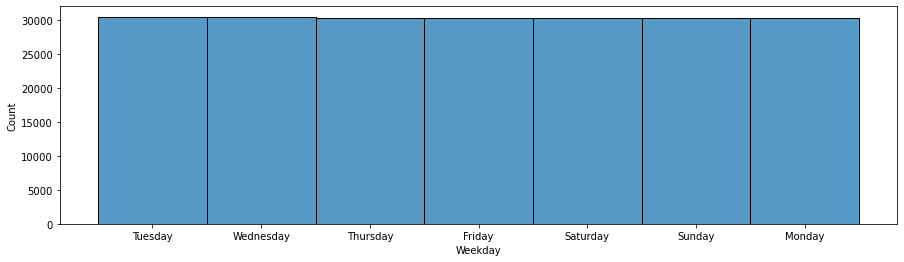

In [16]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Weekday")
plt.show()

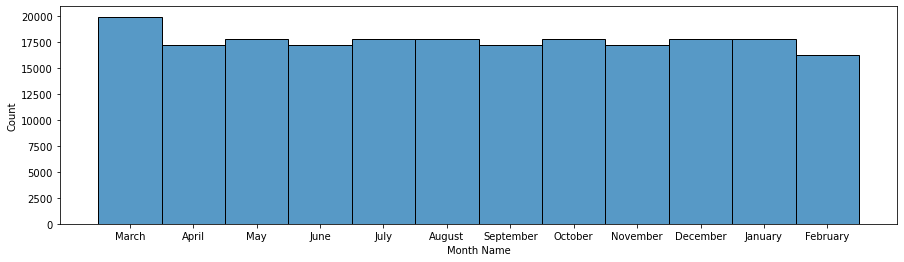

In [17]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Month Name")
plt.show()

In [18]:
# plt.figure(figsize=(10,4)) # this creates a figure 8 inch wide, 4 inch high
# sns.histplot(data, x="STATE")
# plt.show()

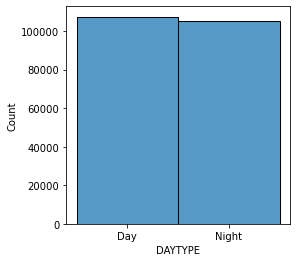

In [19]:
plt.figure(figsize=(4,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="DAYTYPE")
plt.show()

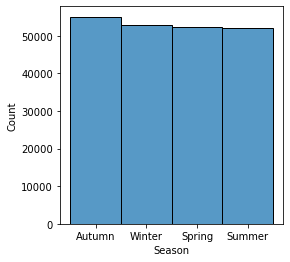

In [20]:
plt.figure(figsize=(4,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Season")
plt.show()

In [21]:
percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missing})
missing_value_df

,% Missing
STATE,0.0
DATETIME,0.0
TOTALDEMAND,0.0
POWER,0.0
LOCATION,0.0
TEMPERATURE,0.0
FORECASTDEMAND,0.0
Weekday,0.0
Quarter,0.0
Month,0.0


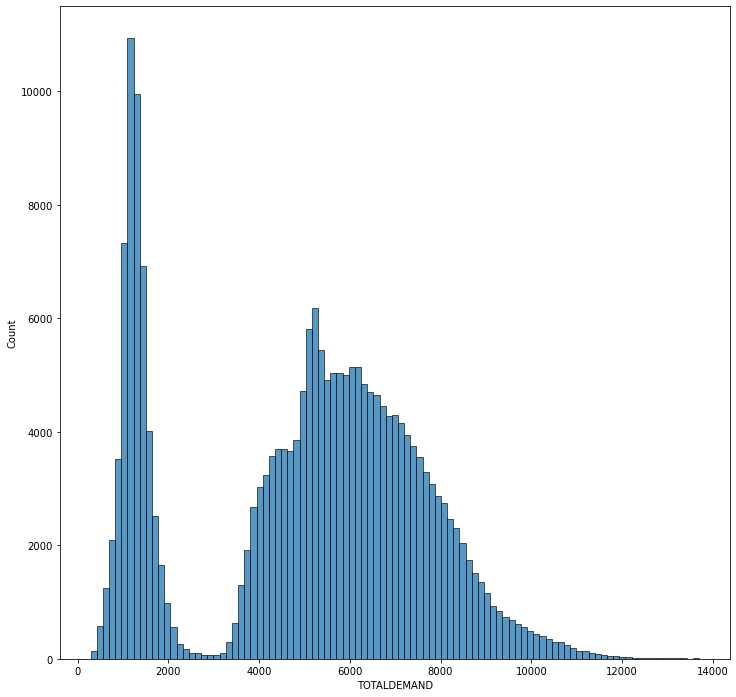

In [22]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="TOTALDEMAND")
plt.show()

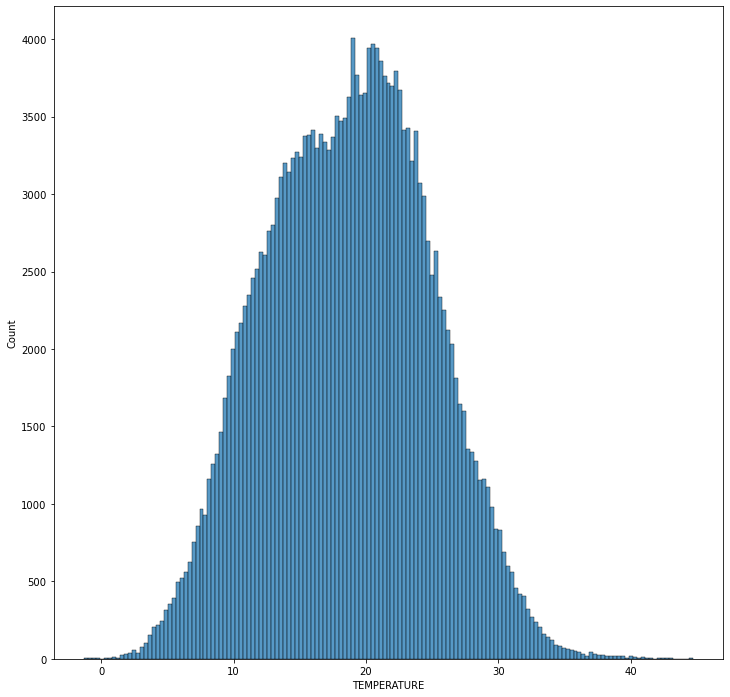

In [23]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="TEMPERATURE")
plt.show()

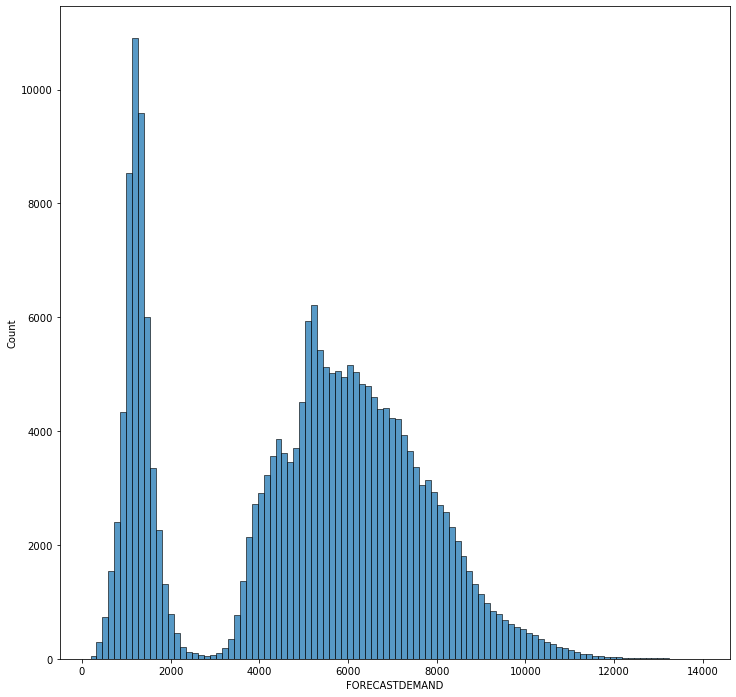

In [24]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="FORECASTDEMAND")
plt.show()

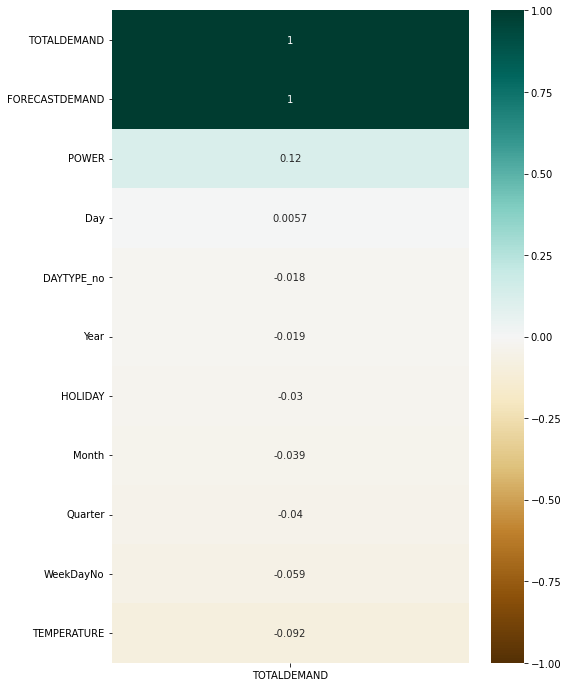

In [26]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['TOTALDEMAND']].sort_values(by='TOTALDEMAND', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

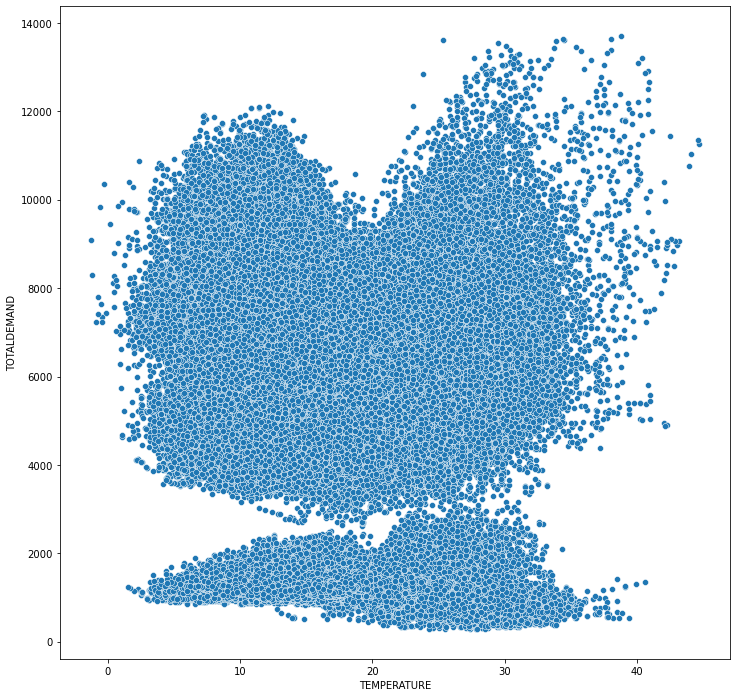

In [27]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.scatterplot(data=data, x="TEMPERATURE", y="TOTALDEMAND")
plt.show()

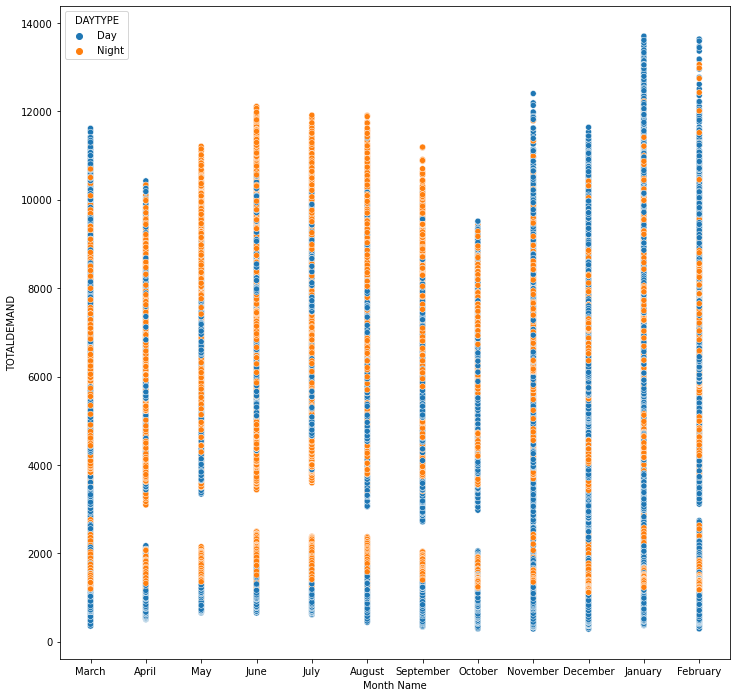

In [28]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.scatterplot(data=data, x="Month Name", y="TOTALDEMAND", hue='DAYTYPE')
plt.show()

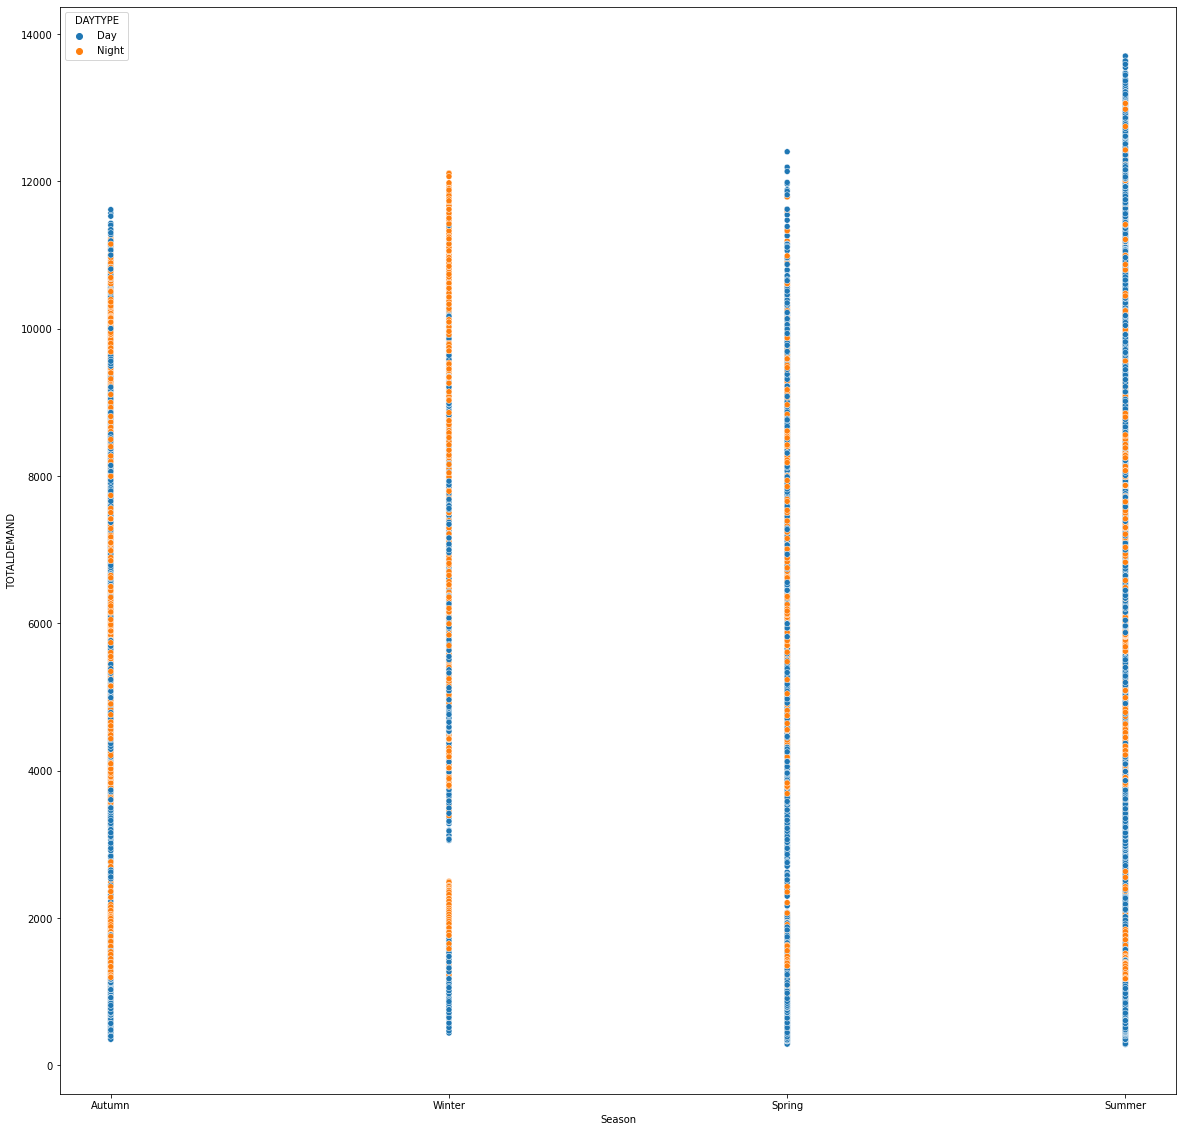

In [29]:
plt.figure(figsize=(20,20)) # this creates a figure 8 inch wide, 4 inch high
sns.scatterplot(data=data, x="Season", y="TOTALDEMAND", hue='DAYTYPE')
plt.show()

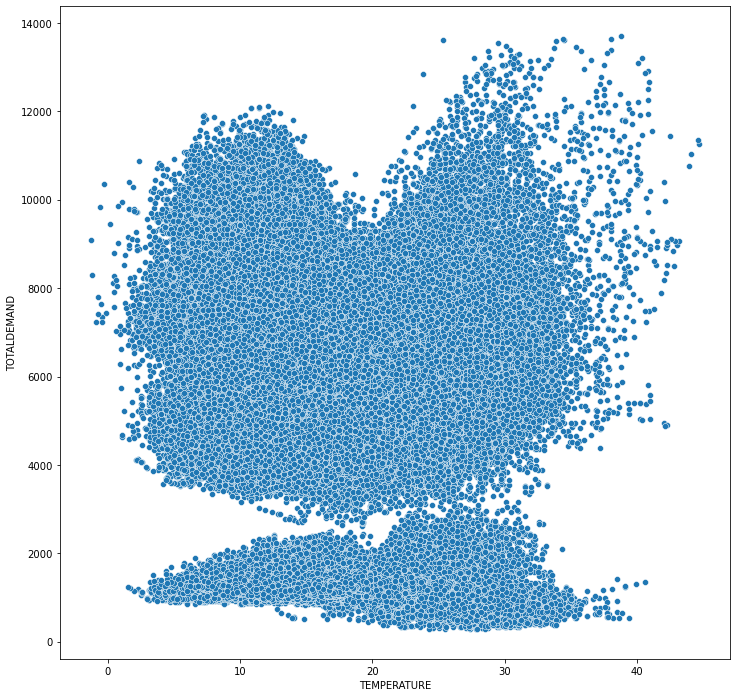

In [30]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.scatterplot(data=data, x="TEMPERATURE", y="TOTALDEMAND")
plt.show()

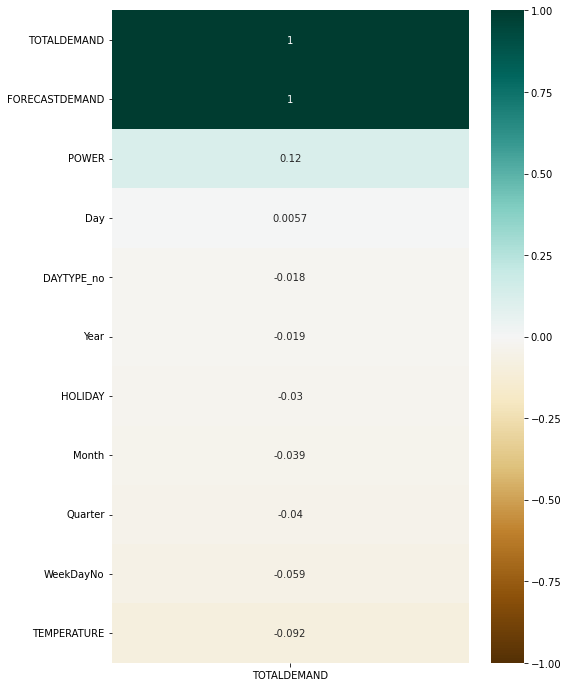

In [31]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['TOTALDEMAND']].sort_values(by='TOTALDEMAND', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:xlabel='DATETIME'>

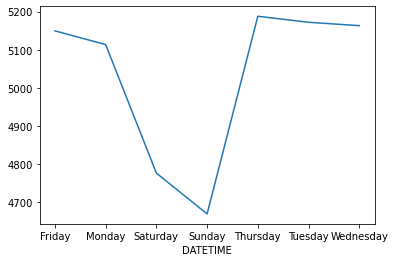

In [32]:
data.groupby(data["DATETIME"].dt.day_name())["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='DATETIME'>

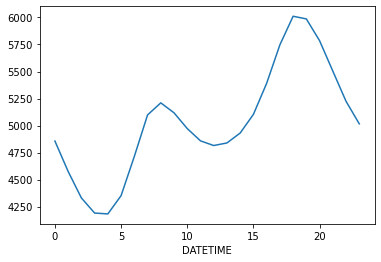

In [33]:
data.groupby(data["DATETIME"].dt.hour)["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='DATETIME'>

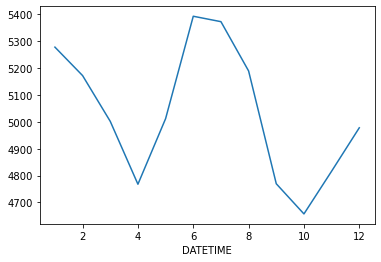

In [34]:
data.groupby(data["DATETIME"].dt.month)["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='Season'>

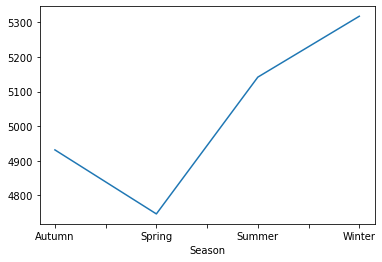

In [35]:
data.groupby(data["Season"])["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='DAYTYPE'>

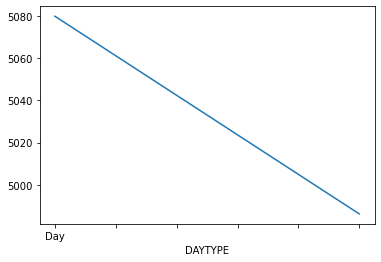

In [36]:
data.groupby(data["DAYTYPE"])["TOTALDEMAND"].mean().plot(kind='line', rot=0)

<AxesSubplot:xlabel='Season'>

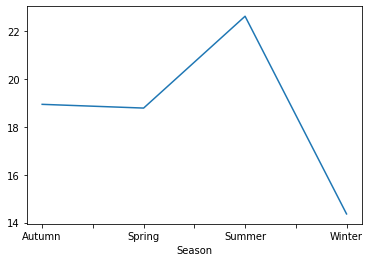

In [37]:
data.groupby(data["Season"])["TEMPERATURE"].mean().plot(kind='line', rot=0)

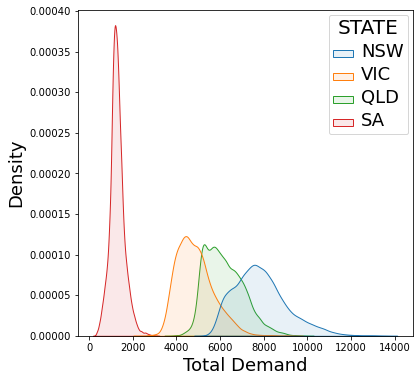

In [48]:
# Total Demand Distribution
plt.figure(figsize=(6,6))
plot = sns.kdeplot(data=data, x='TOTALDEMAND', hue='STATE', fill=True, alpha=0.1)
plt.xlabel('Total Demand', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.setp(plot.get_legend().get_texts(), fontsize='18')
plt.setp(plot.get_legend().get_title(), fontsize='20') 
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.savefig(images+'TotalDemandDistribution.png',bbox_inches='tight')
plt.show()


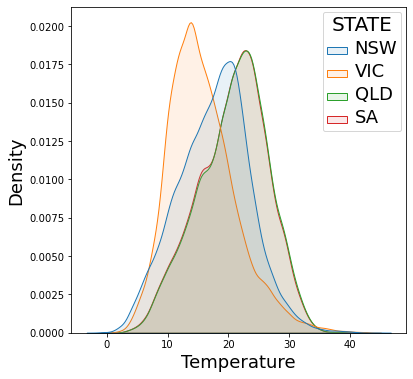

In [50]:
# Total Temperature Distribution
plt.figure(figsize=(6,6))
plot = sns.kdeplot(data=data, x='TEMPERATURE', hue='STATE', fill=True, alpha=0.1)
plt.xlabel('Temperature', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.setp(plot.get_legend().get_texts(), fontsize='18')
plt.setp(plot.get_legend().get_title(), fontsize='20') 
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.savefig(images+'TempDistribution.png',bbox_inches='tight')
plt.show()

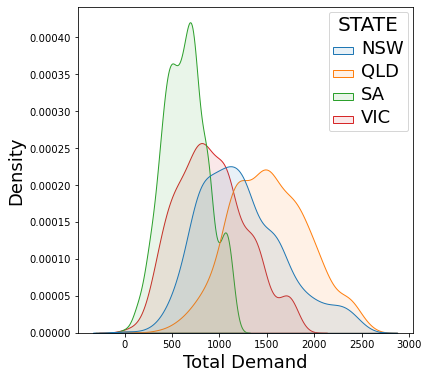

In [49]:
# Total Power Distribution

max_power = data.groupby([data['DATETIME'].dt.date, 'STATE']).aggregate({'POWER':max})

plt.figure(figsize=(6,6))
plot = sns.kdeplot(data=max_power, x='POWER', hue='STATE', fill=True, alpha=0.1)
plt.xlabel('Total Demand', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.setp(plot.get_legend().get_texts(), fontsize='18')
plt.setp(plot.get_legend().get_title(), fontsize='20') 
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.savefig(images+'PowerDistribution.png',bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(20,20)) # this creates a figure 8 inch wide, 4 inch high
sns.scatterplot(data=data, x="Season", y="TOTALDEMAND", hue='DAYTYPE')
plt.show()

<AxesSubplot:xlabel='Weekday', ylabel='TOTALDEMAND'>

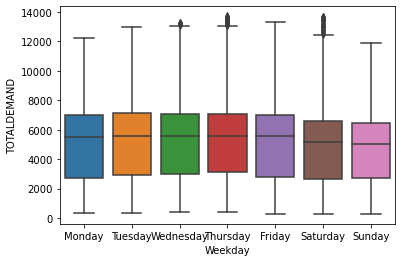

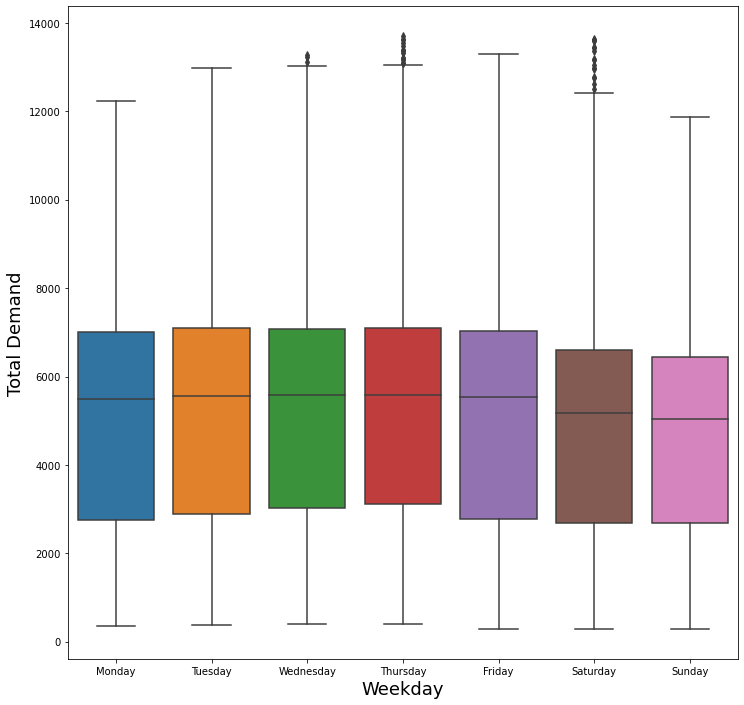

In [57]:
# Total Temperature Distribution
plt.figure(figsize=(12,12))
plot = sns.boxplot(data=data, x=data['Weekday'], y='TOTALDEMAND',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Total Demand', fontsize=18)
plt.savefig(images+'WeeklyBoxPlot.png',bbox_inches='tight')
plt.show()

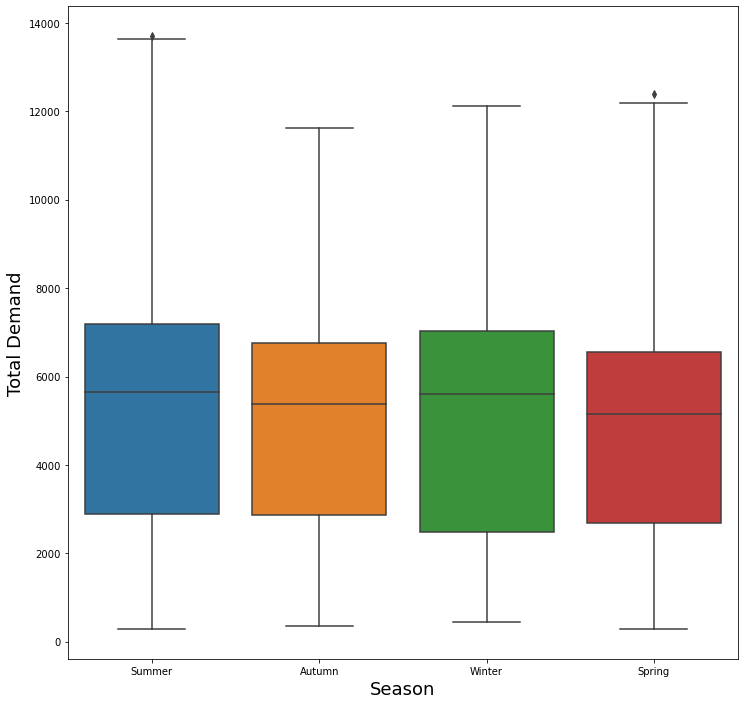

In [59]:
# Total Season Distribution
plt.figure(figsize=(12,12))
plot = sns.boxplot(data=data, x=data['Season'], y='TOTALDEMAND',order=['Summer', 'Autumn', 'Winter', 'Spring'])
plt.xlabel('Season', fontsize=18)
plt.ylabel('Total Demand', fontsize=18)
plt.savefig(images+'SeasonBoxPlot.png',bbox_inches='tight')
plt.show()

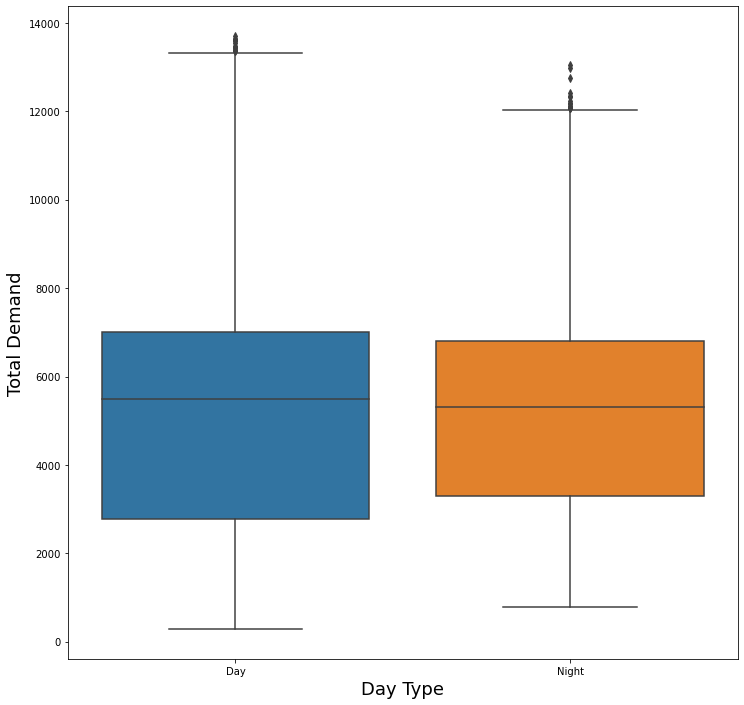

In [63]:
# Total Season Distribution
plt.figure(figsize=(12,12))
plot = sns.boxplot(data=data, x=data['DAYTYPE'], y='TOTALDEMAND',order=['Day','Night'])
plt.xlabel('Day Type', fontsize=18)
plt.ylabel('Total Demand', fontsize=18)
plt.savefig(images+'DayNightBoxPlot.png',bbox_inches='tight')
plt.show()

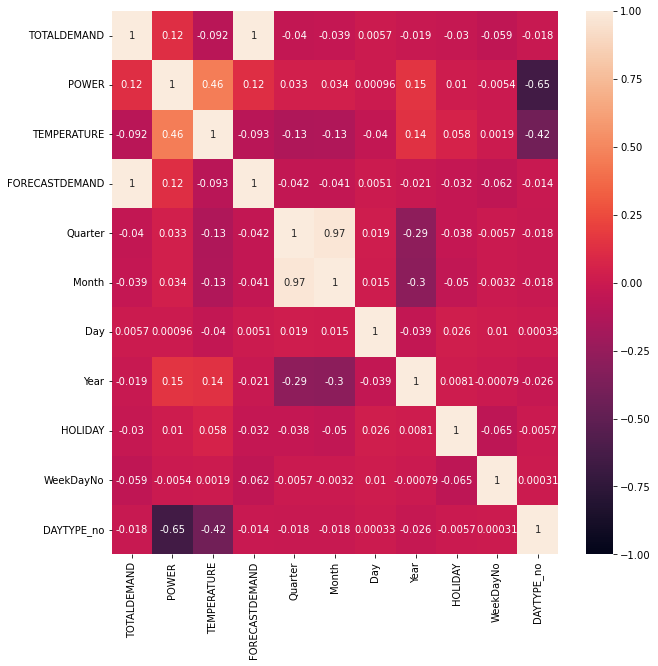

In [70]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig(images+'CorrelationHeatMap.png',bbox_inches='tight')
plt.show()

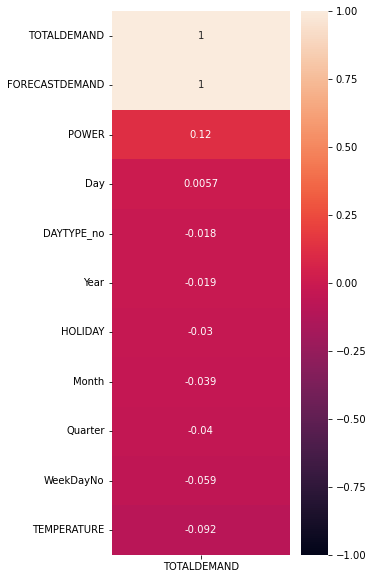

In [75]:
plt.figure(figsize=(4, 10))
heatmap = sns.heatmap(data.corr()[['TOTALDEMAND']].sort_values(by='TOTALDEMAND', ascending=False), vmin=-1, vmax=1, annot=True)
# heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);
plt.savefig(images+'CorrelationHeatMapLong.png',bbox_inches='tight')